In [4]:
# importing needed librarys
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# importing the data
data = pd.read_csv('superstore.csv', encoding='latin1')

In [8]:
# Getting a look at the data 
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
data.isnull().sum() ## checking null values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
data.duplicated() # checking for duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [12]:
cols = ['Order ID', 'Row ID', "Ship Mode", 'Postal Code', 'Product ID', 'Country', 'City',
       'Customer Name', 'Ship Date', 'Customer ID', 'Region', 'State', 'Product Name', 
        'Segment', 'Discount', 'Quantity']
data.drop(columns = cols) ## droping the data I dont want

,Order Date,Category,Sub-Category,Sales,Profit
0,2016-11-08,Furniture,Bookcases,261.9600,41.9136
1,2016-11-08,Furniture,Chairs,731.9400,219.5820
2,2016-06-12,Office Supplies,Labels,14.6200,6.8714
3,2015-10-11,Furniture,Tables,957.5775,-383.0310
4,2015-10-11,Office Supplies,Storage,22.3680,2.5164
...,...,...,...,...,...
9989,2014-01-21,Furniture,Furnishings,25.2480,4.1028
9990,2017-02-26,Furniture,Furnishings,91.9600,15.6332
9991,2017-02-26,Technology,Phones,258.5760,19.3932
9992,2017-02-26,Office Supplies,Paper,29.6000,13.3200


Text(0.5, 1.0, 'Monthly Sales Analysis')

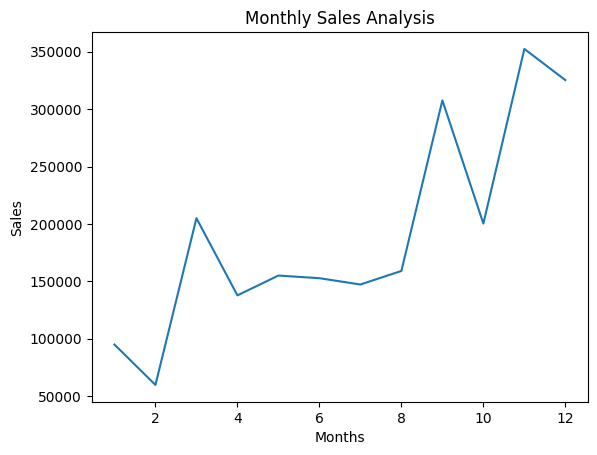

In [29]:
data['Order Date'] = pd.to_datetime(data['Order Date']) # convert order date to a valid date
data['Order Month'] = data['Order Date'].dt.month # creates a new column Order Month with all oreder dates months
sales_month = data.groupby('Order Month')['Sales'].sum().reset_index() # Groups Order Months with month sales
plt.plot(sales_month['Order Month'], sales_month['Sales']) # create plot of the data
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Monthly Sales Analysis')